In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Aiub Courses/CVPR/animals'

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [4]:
catagories = os.listdir(data_path)
print(catagories)

['dogs', 'panda', 'cats']


In [5]:
train_data = []

for c in catagories:
  path = os.path.join(data_path,c)
  label = catagories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr,(32,32))
      train_data.append([img_arr , label])
    except Exception as e:
      pass

print(len(train_data))

100%|██████████| 1000/1000 [00:40<00:00, 24.84it/s]

3000


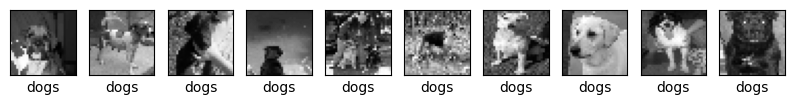

In [6]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
import random
random.shuffle(train_data)

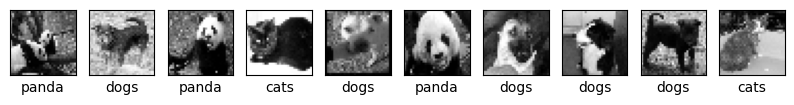

In [8]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [9]:
plt.figure(figsize=(40, 40))
for i in range(len(train_data)):
    plt.subplot(55, 55, i + 1)
    plt.imshow(train_data[i][0], cmap='gray')
    plt.xlabel(catagories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
f1 = train_data[0:600]
f2 = train_data[600:1200]
f3 = train_data[1200:1800]
f4 = train_data[1800:2400]
f5 = train_data[2400:3000]
print(len(f1), len(f2), len(f3), len(f4), len(f5))

600 600 600 600 600


In [11]:
train_set= f1+f2+f3+f4
validation_set = f5
print(len(train_set),len(validation_set))


2400 600


100%|██████████| 600/600 [00:42<00:00, 14.14it/s]


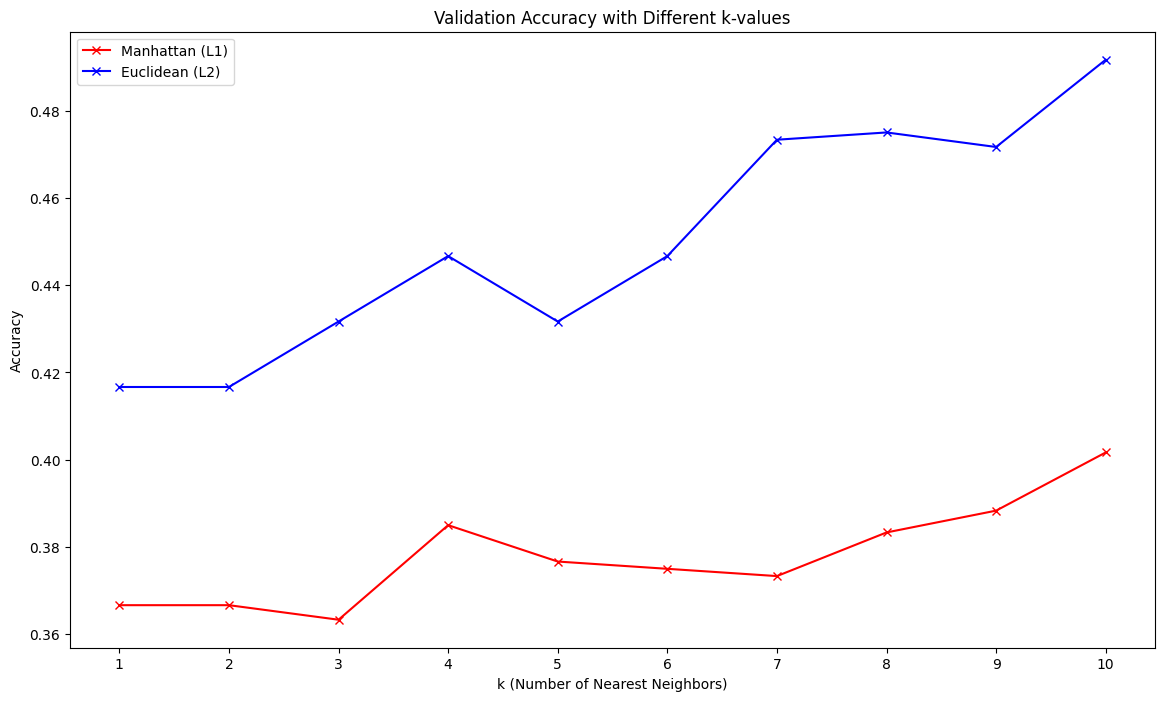

In [12]:
# Initialize lists to hold distances
distances_l1 = []
distances_l2 = []

# Compute distances
for test_img in tqdm(validation_set):
    l1 = []
    l2 = []
    for train_img in train_set:
        l1.append([np.sum(np.abs(test_img[0] - train_img[0])), train_img[1]])
        l2.append([np.sqrt(np.sum((test_img[0] - train_img[0]) ** 2)), train_img[1]])

    l1.sort(key=lambda x: x[0])
    l2.sort(key=lambda x: x[0])

    distances_l1.append(l1)
    distances_l2.append(l2)

# Initialize accuracies dictionaries
accuracies_l1 = {k + 1: [] for k in range(10)}
accuracies_l2 = {k + 1: [] for k in range(10)}

# Compute accuracies
k_neighbours = 10

for k in range(1, k_neighbours + 1):
    correct_pred_l1 = 0
    correct_pred_l2 = 0

    for test_img, l1, l2 in zip(validation_set, distances_l1, distances_l2):
        # L1 distance
        n_neighbours_l1 = l1[:k]
        label_counts_l1 = {}
        label_min_distances_l1 = {}

        for i in range(k):
            label = n_neighbours_l1[i][1]
            distance = n_neighbours_l1[i][0]
            if label not in label_counts_l1:
                label_counts_l1[label] = 0
                label_min_distances_l1[label] = float('Inf')
            label_counts_l1[label] += 1
            label_min_distances_l1[label] = min(label_min_distances_l1[label], distance)

        max_count_l1 = max(label_counts_l1.values())
        candidates_l1 = [label for label, count in label_counts_l1.items() if count == max_count_l1]
        pred_label_l1 = min(candidates_l1, key=lambda label: label_min_distances_l1[label])

        if pred_label_l1 == test_img[1]:
            correct_pred_l1 += 1

        # L2 distance
        n_neighbours_l2 = l2[:k]
        label_counts_l2 = {}
        label_min_distances_l2 = {}

        for i in range(k):
            label = n_neighbours_l2[i][1]
            distance = n_neighbours_l2[i][0]
            if label not in label_counts_l2:
                label_counts_l2[label] = 0
                label_min_distances_l2[label] = float('Inf')
            label_counts_l2[label] += 1
            label_min_distances_l2[label] = min(label_min_distances_l2[label], distance)

        max_count_l2 = max(label_counts_l2.values())
        candidates_l2 = [label for label, count in label_counts_l2.items() if count == max_count_l2]
        pred_label_l2 = min(candidates_l2, key=lambda label: label_min_distances_l2[label])

        if pred_label_l2 == test_img[1]:
            correct_pred_l2 += 1

    accuracies_l1[k].append(correct_pred_l1 / len(validation_set))
    accuracies_l2[k].append(correct_pred_l2 / len(validation_set))

mean_accuracy_l1 = [np.mean(accuracies_l1[k]) for k in range(1, k_neighbours + 1)]
mean_accuracy_l2 = [np.mean(accuracies_l2[k]) for k in range(1, k_neighbours + 1)]

# Plotting results
k_values = range(1, k_neighbours + 1)

plt.figure(figsize=(14, 8))
plt.plot(k_values, mean_accuracy_l1, marker='x', linestyle='-', color='r', label='Manhattan (L1)')
plt.plot(k_values, mean_accuracy_l2, marker='x', linestyle='-', color='b', label='Euclidean (L2)')
plt.title('Validation Accuracy with Different k-values')
plt.xlabel('k (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(k_values)
plt.show()